In [ ]:
import pandas as pd

merged_feature = pd.read_csv("Merged_Feature.csv")
labels = pd.read_csv("Labels.csv")

## Bagging Ensemble Method

### Random Forest:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support


def rf(X_train, X_test, y_train, y_test):

  # Create a Random Forest model with a specified number of trees
  # model = RandomForestClassifier(n_estimators=100,random_state=42)  # You can change the number of trees
  model = RandomForestClassifier(max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42)

  # Train the model on the training data
  model.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = model.predict(X_test)

  # Evaluate the model
  rf_accuracy = accuracy_score(y_test, y_pred)
  rf_f1 = f1_score(y_test, y_pred, average='macro')
  rf_pre = precision_score(y_test, y_pred, average='macro')
  rf_rec = recall_score(y_test, y_pred, average='macro')

  # Precision group-wise
  rf_grp_prec, rf_grp_rec, rf_grp_f1, _  = precision_recall_fscore_support(y_test, y_pred, average=None)

  return rf_accuracy, rf_pre, rf_rec, rf_f1, rf_grp_prec, rf_grp_rec, rf_grp_f1, model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(merged_feature, labels, test_size=0.2, random_state=42, stratify=labels)

In [ ]:
rf_pred = rf(X_train, X_test, y_train, y_test)
rf_pred

In [ ]:
import joblib

# Save the model to a file
joblib.dump(rf_pred[7], 'RF_80.joblib')

# Load the model from the file
# clf = joblib.load('RF_78_48.joblib')

['RF_80.joblib']

In [ ]:
X_train.to_csv("X_train.csv",index=False)
X_test.to_csv("X_test.csv",index=False)
y_train.to_csv("y_train.csv",index=False)
y_test.to_csv("y_test.csv",index=False)

## Top-N Performance

In [ ]:
import numpy as np

def topn_pred(y_prob, class_labels, n):

  # Generate modified y_pred
  y_pred_modified = []
  top_n_preds_indices = np.argsort(y_prob, axis=1)[:, -n:]
  for i, indices in enumerate(top_n_preds_indices):
      top_n_preds = class_labels[indices]
      true_label = y_test.iloc[i] if hasattr(y_test, 'iloc') else y_test[i]  # Adjust for pandas Series or numpy array
      if true_label in top_n_preds:
          y_pred_modified.append(true_label)
      else:
          y_pred_modified.append(top_n_preds[-1])  # Append top-1 prediction

  # Convert to numpy array for consistency
  y_pred_modified = np.array(y_pred_modified)

  return y_pred_modified

In [ ]:
model = rf_pred[7]

performance=[]
num=[]

for n in range(1,len(filtered_df["group"].value_counts())+1):
  # print("\n")
  print(n)
  num.append(n)

  # y_prob, class_labels = rf(X_train, X_test, y_train, y_test)

  # Predict probabilities
  y_prob = model.predict_proba(X_test)

  # Get class labels from the classifier
  class_labels = model.classes_

  # Make predictions on the test data
  y_pred = topn_pred(y_prob, class_labels,n)

  # Evaluate the model
  rf_accuracy = accuracy_score(y_test, y_pred)
  rf_f1 = f1_score(y_test, y_pred, average='macro')
  rf_pre = precision_score(y_test, y_pred, average='macro')
  rf_rec = recall_score(y_test, y_pred, average='macro')

  print(list(map(lambda x: round(x, 4)*100,[rf_accuracy, rf_pre, rf_rec, rf_f1])))
  performance.append(list(map(lambda x: round(x, 4)*100,[rf_accuracy, rf_pre, rf_rec, rf_f1])))


performance_df = pd.DataFrame(performance)
performance_df.columns = ["Accuracy","Precision","Recall","F1-Score"]
performance_df["Top-N"] = num

1
[77.42, 80.84, 74.15, 76.55]
2
[84.32, 89.5, 80.97, 84.08]
3
[87.81, 91.78, 83.5, 86.39]
4
[90.01, 93.08999999999999, 85.7, 88.38000000000001]
5
[92.01, 94.5, 87.77000000000001, 90.34]
6
[93.31, 95.35, 88.85, 91.32000000000001]
7
[94.31, 95.99, 90.09, 92.31]
8
[95.39999999999999, 96.91, 91.53, 93.55]
9
[96.0, 97.45, 92.15, 94.17]
10
[96.7, 97.77, 93.78, 95.3]
11
[96.7, 97.77, 93.78, 95.3]
12
[97.3, 98.06, 94.5, 95.83]
13
[97.5, 98.17, 94.74000000000001, 96.02000000000001]
14
[97.7, 98.50999999999999, 94.94, 96.3]
15
[97.89999999999999, 98.66, 95.1, 96.45]
16
[98.4, 98.96000000000001, 96.15, 97.27]
17
[98.7, 99.2, 96.75, 97.78999999999999]
18
[99.0, 99.36, 97.41, 98.25]
19
[99.7, 99.82, 99.4, 99.59]
20
[99.7, 99.82, 99.4, 99.59]
21
[99.8, 99.86, 99.47, 99.65]
22
[99.9, 99.89, 99.92999999999999, 99.91]
23
[99.9, 99.89, 99.92999999999999, 99.91]
24
[99.9, 99.89, 99.92999999999999, 99.91]
25
[99.9, 99.89, 99.92999999999999, 99.91]
26
[99.9, 99.89, 99.92999999999999, 99.91]
27
[100.0, 100

In [ ]:
performance_df

,Accuracy,Precision,Recall,F1-Score,Top-N
0,77.42,80.84,74.15,76.55,1
1,84.32,89.50,80.97,84.08,2
2,87.81,91.78,83.50,86.39,3
3,90.01,93.09,85.70,88.38,4
4,92.01,94.50,87.77,90.34,5
5,93.31,95.35,88.85,91.32,6
6,94.31,95.99,90.09,92.31,7
7,95.40,96.91,91.53,93.55,8
8,96.00,97.45,92.15,94.17,9
9,96.70,97.77,93.78,95.30,10


In [ ]:
performance_df.to_csv("PERFORMANCE_TOP_N.csv",index=False)

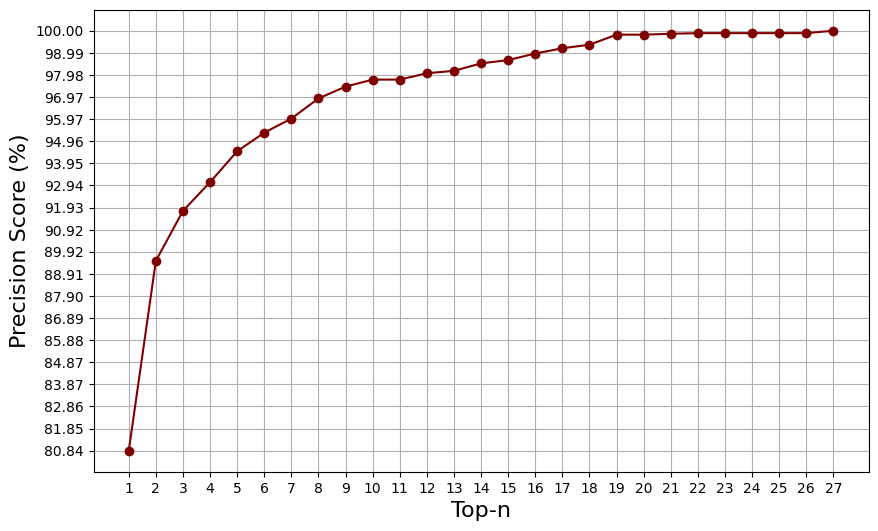

In [ ]:
import matplotlib.pyplot as plt

# Example precision scores
precision_scores = list(performance_df["Precision"])  # Your precision scores list

# Thresholds from 1 to 27
thresholds = list(performance_df["Top-N"])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, marker='o', color='Maroon')  # 'o' creates points at each data point

plt.xlabel('Top-n', fontsize=16)
plt.ylabel('Precision Score (%)', fontsize=16)
# plt.title('Precision Scores vs. Top-n')
plt.grid(True)
plt.xticks(thresholds)  # Ensures that every threshold is marked
# plt.yticks([i/10.0 for i in range(0, 11)])  # Adjust y-axis ticks if necessary
# Adjust y-axis ticks based on precision score range
y_ticks = [round(i, 2) for i in np.linspace(min(precision_scores), max(precision_scores), num=20)]
plt.yticks(y_ticks)

# Saving the figure as a PDF
plt.savefig("precision_vs_top-n.pdf", format='pdf', bbox_inches='tight')


plt.show()


In [ ]:
performance_df.iloc[0][0:4].to_dict()

{'Accuracy': 77.42, 'Precision': 80.84, 'Recall': 74.15, 'F1-Score': 76.55}